In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
targets = pd.read_csv("../../data/Targets_and_commitments.csv", sep=",")
columns = ['ISSUER_ISIN',
           'CARBON_EMISSIONS_TARGET_BASE_YEAR',
           'CARBON_EMISSIONS_TARGET_REDUCT_PCT',
           'CARBON_EMISSIONS_TARGET_YEAR',
           'HAS_COMMITTED_TO_SBTI_TARGET',
           'HAS_SBTI_APPROVED_TARGET',
           'TARGET_SUMMARY_ANNUAL_REDUCTION',
           'TARGET_SUMMARY_CUM_CHANGE_2030', 
           'TARGET_SUMMARY_CUM_CHANGE_2050',
           'TARGET_SUMMARY_CUM_CHANGE_2070',
           'TARGET_SUMMARY_CURRENT_PROGRESS',
           'TARGET_SUMMARY_NNZERO_2030',
           'TARGET_SUMMARY_NNZERO_2050',
           'TARGET_SUMMARY_NNZERO_2070',
           'TARGET_SUMMARY_SCOPES',
           'TARGET_SUMMARY_SELF_DECLARED_NZERO',
           'TARGET_SUMMARY_TRACK_RECORD',
           'TARGET_SUMMARY_TYPES',
           'TARGET_SUMMARY_UNITS']

targets = targets[columns]
targets

,ISSUER_ISIN,CARBON_EMISSIONS_TARGET_BASE_YEAR,CARBON_EMISSIONS_TARGET_REDUCT_PCT,CARBON_EMISSIONS_TARGET_YEAR,HAS_COMMITTED_TO_SBTI_TARGET,HAS_SBTI_APPROVED_TARGET,TARGET_SUMMARY_ANNUAL_REDUCTION,TARGET_SUMMARY_CUM_CHANGE_2030,TARGET_SUMMARY_CUM_CHANGE_2050,TARGET_SUMMARY_CUM_CHANGE_2070,TARGET_SUMMARY_CURRENT_PROGRESS,TARGET_SUMMARY_NNZERO_2030,TARGET_SUMMARY_NNZERO_2050,TARGET_SUMMARY_NNZERO_2070,TARGET_SUMMARY_SCOPES,TARGET_SUMMARY_SELF_DECLARED_NZERO,TARGET_SUMMARY_TRACK_RECORD,TARGET_SUMMARY_TYPES,TARGET_SUMMARY_UNITS
0,US1264081035,2014.0,37.3,2030.0,NaN,True,-0.010626,-0.069048,0.049633,0.194446,Not on track with any targets,NaN,NaN,NaN,"1,2",NaN,Met some targets,INTENSITY,Other
1,US1270971039,2019.0,81.0,2023.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA5592224011,2021.0,100.0,2050.0,NaN,True,-0.035714,-0.298376,-1.000000,-1.000000,Not on track with any targets,NaN,True,True,"1,2,3",True,Met some targets,ABSOLUTE,tCO2e
3,US8326964058,2019.0,28.0,2030.0,NaN,True,-0.002010,-0.016084,-0.014692,-0.012993,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,"ABSOLUTE, INTENSITY","tCO2e, tCO2e/unit of production"
4,US8425871071,2007.0,100.0,2050.0,NaN,False,-0.025491,-0.042689,-0.713745,-0.650715,On track with all targets,NaN,NaN,NaN,1,NaN,Met some targets,ABSOLUTE,tCO2e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,US31488V1070,2020.0,35.0,2026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1386,IE000IVNQZ81,2022.0,30.0,2032.0,True,True,-0.036983,-0.307717,-0.369834,-0.369834,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,ABSOLUTE,tCO2e
1387,US88339J1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1388,CA89156V1067,2020.0,55.0,2027.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
msci = pd.read_csv("../../data/CarbonIntensity.csv", sep=",")


In [4]:
# Join on ISSUER_ISIN
msci_vs_target = pd.merge(msci, targets, how="left", on="ISSUER_ISIN")

msci_vs_target

,ISSUER_ISIN,GICS_SUB_IND,GICS_SECTOR,EST_EU_TAXONOMY_MAX_REV,CT_TOTAL_MAX_REV,EU_TAXONOMY_ADAPTATION_ELIGIBLE_MAX_REV,EU_TAXONOMY_MITIGATION_ELIGIBLE_MAX_REV,GICS_SECTOR.1,Weight,CI_Scope12_FY09,...,TARGET_SUMMARY_CUM_CHANGE_2070,TARGET_SUMMARY_CURRENT_PROGRESS,TARGET_SUMMARY_NNZERO_2030,TARGET_SUMMARY_NNZERO_2050,TARGET_SUMMARY_NNZERO_2070,TARGET_SUMMARY_SCOPES,TARGET_SUMMARY_SELF_DECLARED_NZERO,TARGET_SUMMARY_TRACK_RECORD,TARGET_SUMMARY_TYPES,TARGET_SUMMARY_UNITS
0,US1264081035,Rail Transportation,Industrials,0.00,0.00,100.00,100.00,Industrials,0.001031,343.087944,...,0.194446,Not on track with any targets,NaN,NaN,NaN,"1,2",NaN,Met some targets,INTENSITY,Other
1,US1270971039,Oil & Gas Exploration & Production,Energy,0.00,0.00,0.00,0.00,Energy,0.000281,64.224666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA5592224011,Automotive Parts & Equipment,Consumer Discretionary,7.97,8.50,100.00,100.00,Consumer Discretionary,0.000191,14.742824,...,-1.000000,Not on track with any targets,NaN,True,True,"1,2,3",True,Met some targets,ABSOLUTE,tCO2e
3,US8326964058,Packaged Foods & Meats,Consumer Staples,0.00,0.00,0.00,0.00,Consumer Staples,0.000177,49.206720,...,-0.012993,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,"ABSOLUTE, INTENSITY","tCO2e, tCO2e/unit of production"
4,US8425871071,Electric Utilities,Utilities,6.41,6.41,33.34,33.34,Utilities,0.001427,4893.920010,...,-0.650715,On track with all targets,NaN,NaN,NaN,1,NaN,Met some targets,ABSOLUTE,tCO2e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,US5049221055,Health Care Services,Health Care,0.00,0.00,23.00,0.00,Health Care,0.000299,11.465268,...,-0.015092,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Not applicable,ABSOLUTE,tCO2e
1128,US4385161066,Industrial Conglomerates,Industrials,4.90,4.90,55.35,55.35,Industrials,0.002251,126.421363,...,-0.146516,On track with some targets,NaN,NaN,NaN,"1,2,3",NaN,Met some targets,ABSOLUTE,tCO2e
1129,US88160R1014,Automobile Manufacturers,Consumer Discretionary,100.00,100.00,100.00,100.00,Consumer Discretionary,0.014990,0.032106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,US31488V1070,Trading Companies & Distributors,Industrials,0.00,3.29,100.00,100.00,Industrials,0.000612,22.528434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


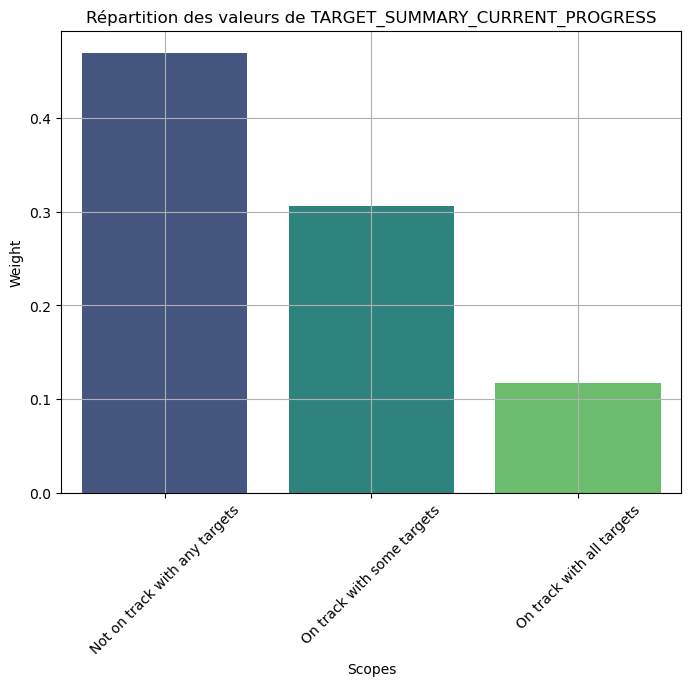

In [5]:
plt.figure(figsize=(8, 6))

sns.barplot(data=msci_vs_target, x='TARGET_SUMMARY_CURRENT_PROGRESS', y="Weight", palette='viridis', estimator="sum", errorbar=None)

plt.title("Répartition des valeurs de TARGET_SUMMARY_CURRENT_PROGRESS")
plt.xlabel("Scopes")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [6]:
frequency_table = pd.DataFrame({
    'HAS_COMMITTED_TO_SBTI_TARGET': [
        msci_vs_target.loc[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'].isna(), "Weight"].sum(),       
        msci_vs_target.loc[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == True, "Weight"].sum(),    
        msci_vs_target.loc[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == False, "Weight"].sum()  
    ],
    'HAS_SBTI_APPROVED_TARGET': [
        msci_vs_target.loc[msci_vs_target['HAS_SBTI_APPROVED_TARGET'].isna(), "Weight"].sum(),            
        msci_vs_target.loc[msci_vs_target['HAS_SBTI_APPROVED_TARGET'] == True, "Weight"].sum(),       
        msci_vs_target.loc[msci_vs_target['HAS_SBTI_APPROVED_TARGET'] == False, "Weight"].sum()        
    ]
}, index=['NaN', 'True', 'False'])

print(frequency_table)

       HAS_COMMITTED_TO_SBTI_TARGET  HAS_SBTI_APPROVED_TARGET
NaN                        0.560656                  0.391580
True                       0.109552                  0.490675
False                      0.329792                  0.117744


In [7]:
# Convertir 'HAS_SBTI_APPROVED_TARGET' en chaîne de caractères ('nan', 'true', 'false')
msci_vs_target['HAS_SBTI_APPROVED_TARGET'] = msci_vs_target['HAS_SBTI_APPROVED_TARGET'].apply(
    lambda x: 'nan' if pd.isna(x) else ('true' if x else 'false')
)

# Filtrer les données en fonction de la colonne 'HAS_COMMITTED_TO_SBTI_TARGET'
msci_vs_target_committed_nan = msci_vs_target[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'].isna()]
msci_vs_target_committed_false = msci_vs_target[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == False]
msci_vs_target_committed_true = msci_vs_target[msci_vs_target['HAS_COMMITTED_TO_SBTI_TARGET'] == True]

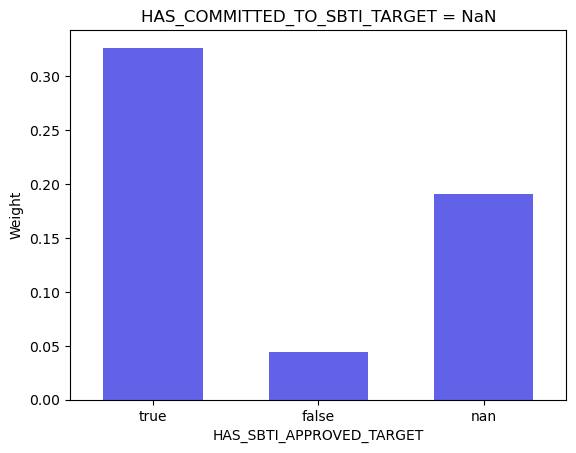

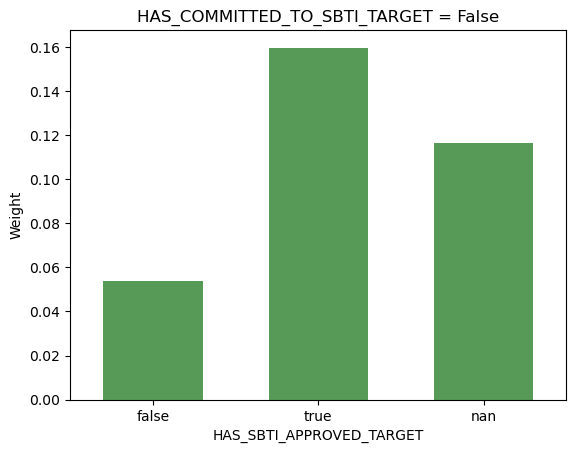

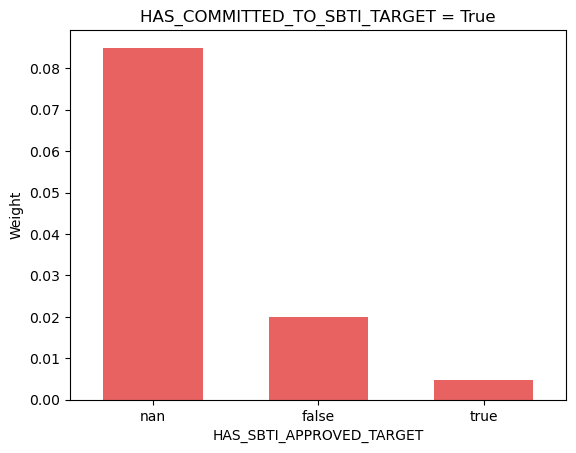

In [8]:
sns.barplot(data=msci_vs_target_committed_nan, x="HAS_SBTI_APPROVED_TARGET", y="Weight", estimator="sum", color='blue', alpha=0.7, width=0.6, errorbar=None)
plt.title("HAS_COMMITTED_TO_SBTI_TARGET = NaN")
plt.xlabel("HAS_SBTI_APPROVED_TARGET")
plt.ylabel("Weight")
plt.show()

sns.barplot(data=msci_vs_target_committed_false, x="HAS_SBTI_APPROVED_TARGET", y="Weight", estimator="sum", color='green', alpha=0.7, width=0.6, errorbar=None)
plt.title("HAS_COMMITTED_TO_SBTI_TARGET = False")
plt.xlabel("HAS_SBTI_APPROVED_TARGET")
plt.ylabel("Weight")
plt.show()

sns.barplot(data=msci_vs_target_committed_true, x="HAS_SBTI_APPROVED_TARGET", y="Weight", estimator="sum", color='red', alpha=0.7, width=0.6, errorbar=None)
plt.title("HAS_COMMITTED_TO_SBTI_TARGET = True")
plt.xlabel("HAS_SBTI_APPROVED_TARGET")
plt.ylabel("Weight")
plt.show()

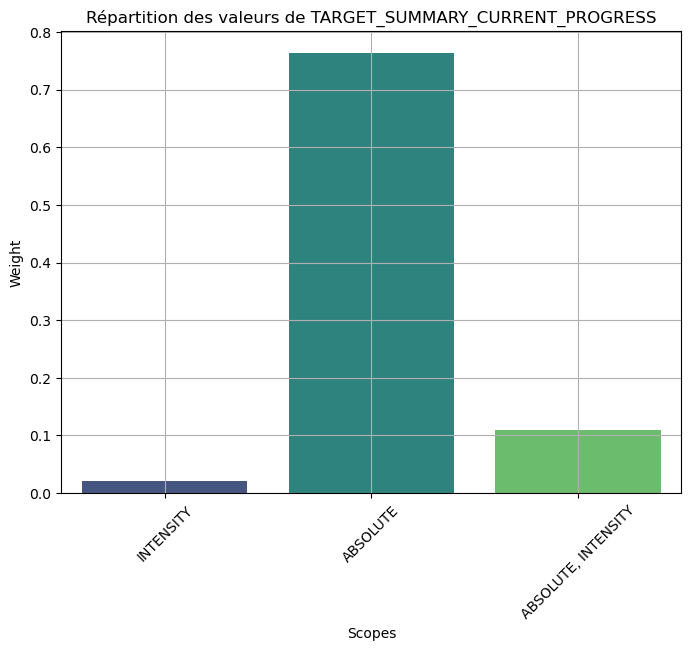

In [9]:
plt.figure(figsize=(8, 6))

sns.barplot(data=msci_vs_target, x='TARGET_SUMMARY_TYPES', y="Weight", estimator="sum", errorbar=None, palette='viridis')

plt.title("Répartition des valeurs de TARGET_SUMMARY_CURRENT_PROGRESS")
plt.xlabel("Scopes")
plt.ylabel("Weight")
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [10]:
msci_vs_target_scope_1_2 = msci_vs_target[msci_vs_target['TARGET_SUMMARY_SCOPES'] == '1,2']
msci_vs_target_scope_1_2_3 = msci_vs_target[msci_vs_target['TARGET_SUMMARY_SCOPES'] == '1,2,3']
msci_vs_target_other_scope = msci_vs_target[~msci_vs_target['TARGET_SUMMARY_SCOPES'].isin(['1,2', '1,2,3'])] 

missing = msci_vs_target_scope_1_2[msci_vs_target_scope_1_2['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].isna()]['Weight'].sum()
present = msci_vs_target_scope_1_2[msci_vs_target_scope_1_2['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].notna()]['Weight'].sum()
missing3 = msci_vs_target_scope_1_2_3[msci_vs_target_scope_1_2_3['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].isna()]['Weight'].sum()
present3 = msci_vs_target_scope_1_2_3[msci_vs_target_scope_1_2_3['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].notna()]['Weight'].sum()
missingO = msci_vs_target_other_scope[msci_vs_target_other_scope['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].isna()]['Weight'].sum()
presentO = msci_vs_target_other_scope[msci_vs_target_other_scope['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].notna()]['Weight'].sum()

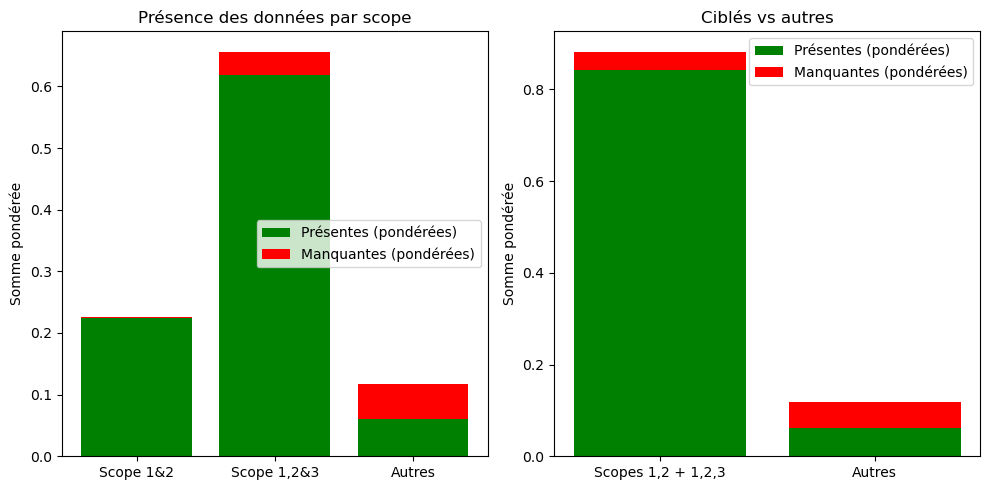

In [11]:
groups = ['Scope 1&2', 'Scope 1,2&3', 'Autres']
missing_vals = [missing, missing3, missingO]
present_vals = [present, present3, presentO]

missing_agg = missing + missing3
present_agg = present + present3

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
x = range(len(groups))
plt.bar(x, present_vals, label='Présentes (pondérées)', color='green')
plt.bar(x, missing_vals, bottom=present_vals, label='Manquantes (pondérées)', color='red')
plt.xticks(ticks=x, labels=groups)
plt.ylabel("Somme pondérée")
plt.title("Présence des données par scope")
plt.legend()

plt.subplot(1, 2, 2)
x2 = ['Scopes 1,2 + 1,2,3', 'Autres']
missing_vals2 = [missing_agg, missingO]
present_vals2 = [present_agg, presentO]
x = range(len(x2))
plt.bar(x, present_vals2, label='Présentes (pondérées)', color='green')
plt.bar(x, missing_vals2, bottom=present_vals2, label='Manquantes (pondérées)', color='red')
plt.xticks(ticks=x, labels=x2)
plt.ylabel("Somme pondérée")
plt.title("Ciblés vs autres")
plt.legend()

plt.tight_layout()
plt.show()


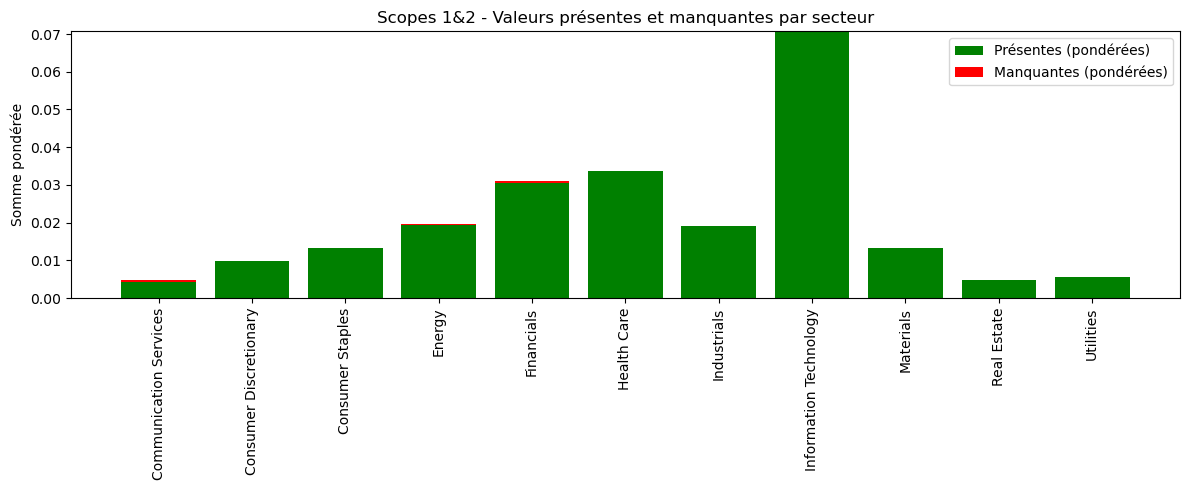

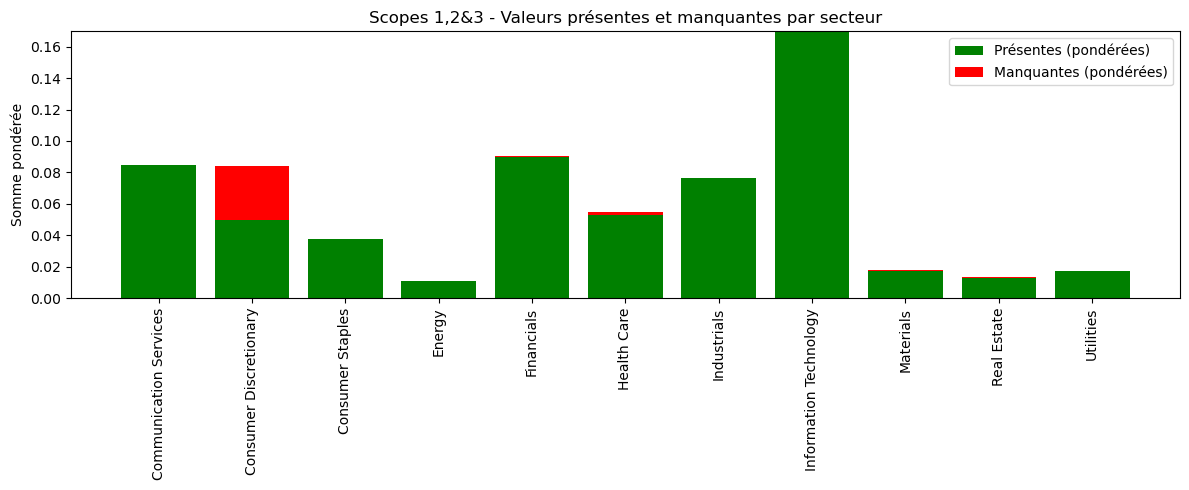

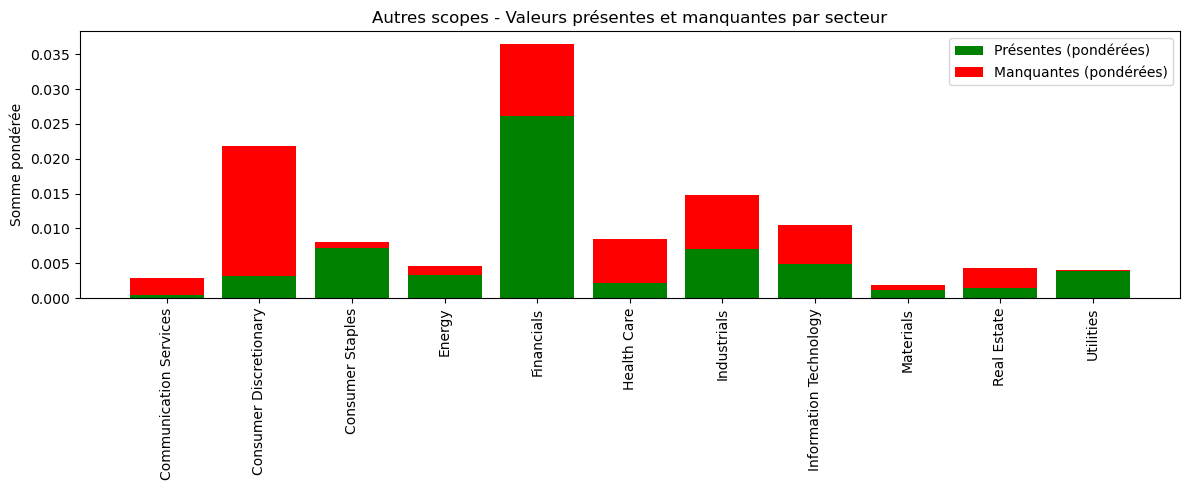

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_missing_by_sector(df, title):
    grouped = df.groupby('GICS_SECTOR')
    present = grouped.apply(lambda x: x[x['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].notna()]['Weight'].sum())
    missing = grouped.apply(lambda x: x[x['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].isna()]['Weight'].sum())
    
    sectors = present.index
    x = range(len(sectors))

    plt.figure(figsize=(12, 5))
    plt.bar(x, present, label='Présentes (pondérées)', color='green')
    plt.bar(x, missing, bottom=present, label='Manquantes (pondérées)', color='red')
    plt.xticks(ticks=x, labels=sectors, rotation=90)
    plt.ylabel("Somme pondérée")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_missing_by_sector(msci_vs_target_scope_1_2, "Scopes 1&2 - Valeurs présentes et manquantes par secteur")
plot_missing_by_sector(msci_vs_target_scope_1_2_3, "Scopes 1,2&3 - Valeurs présentes et manquantes par secteur")
plot_missing_by_sector(msci_vs_target_other_scope, "Autres scopes - Valeurs présentes et manquantes par secteur")

c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

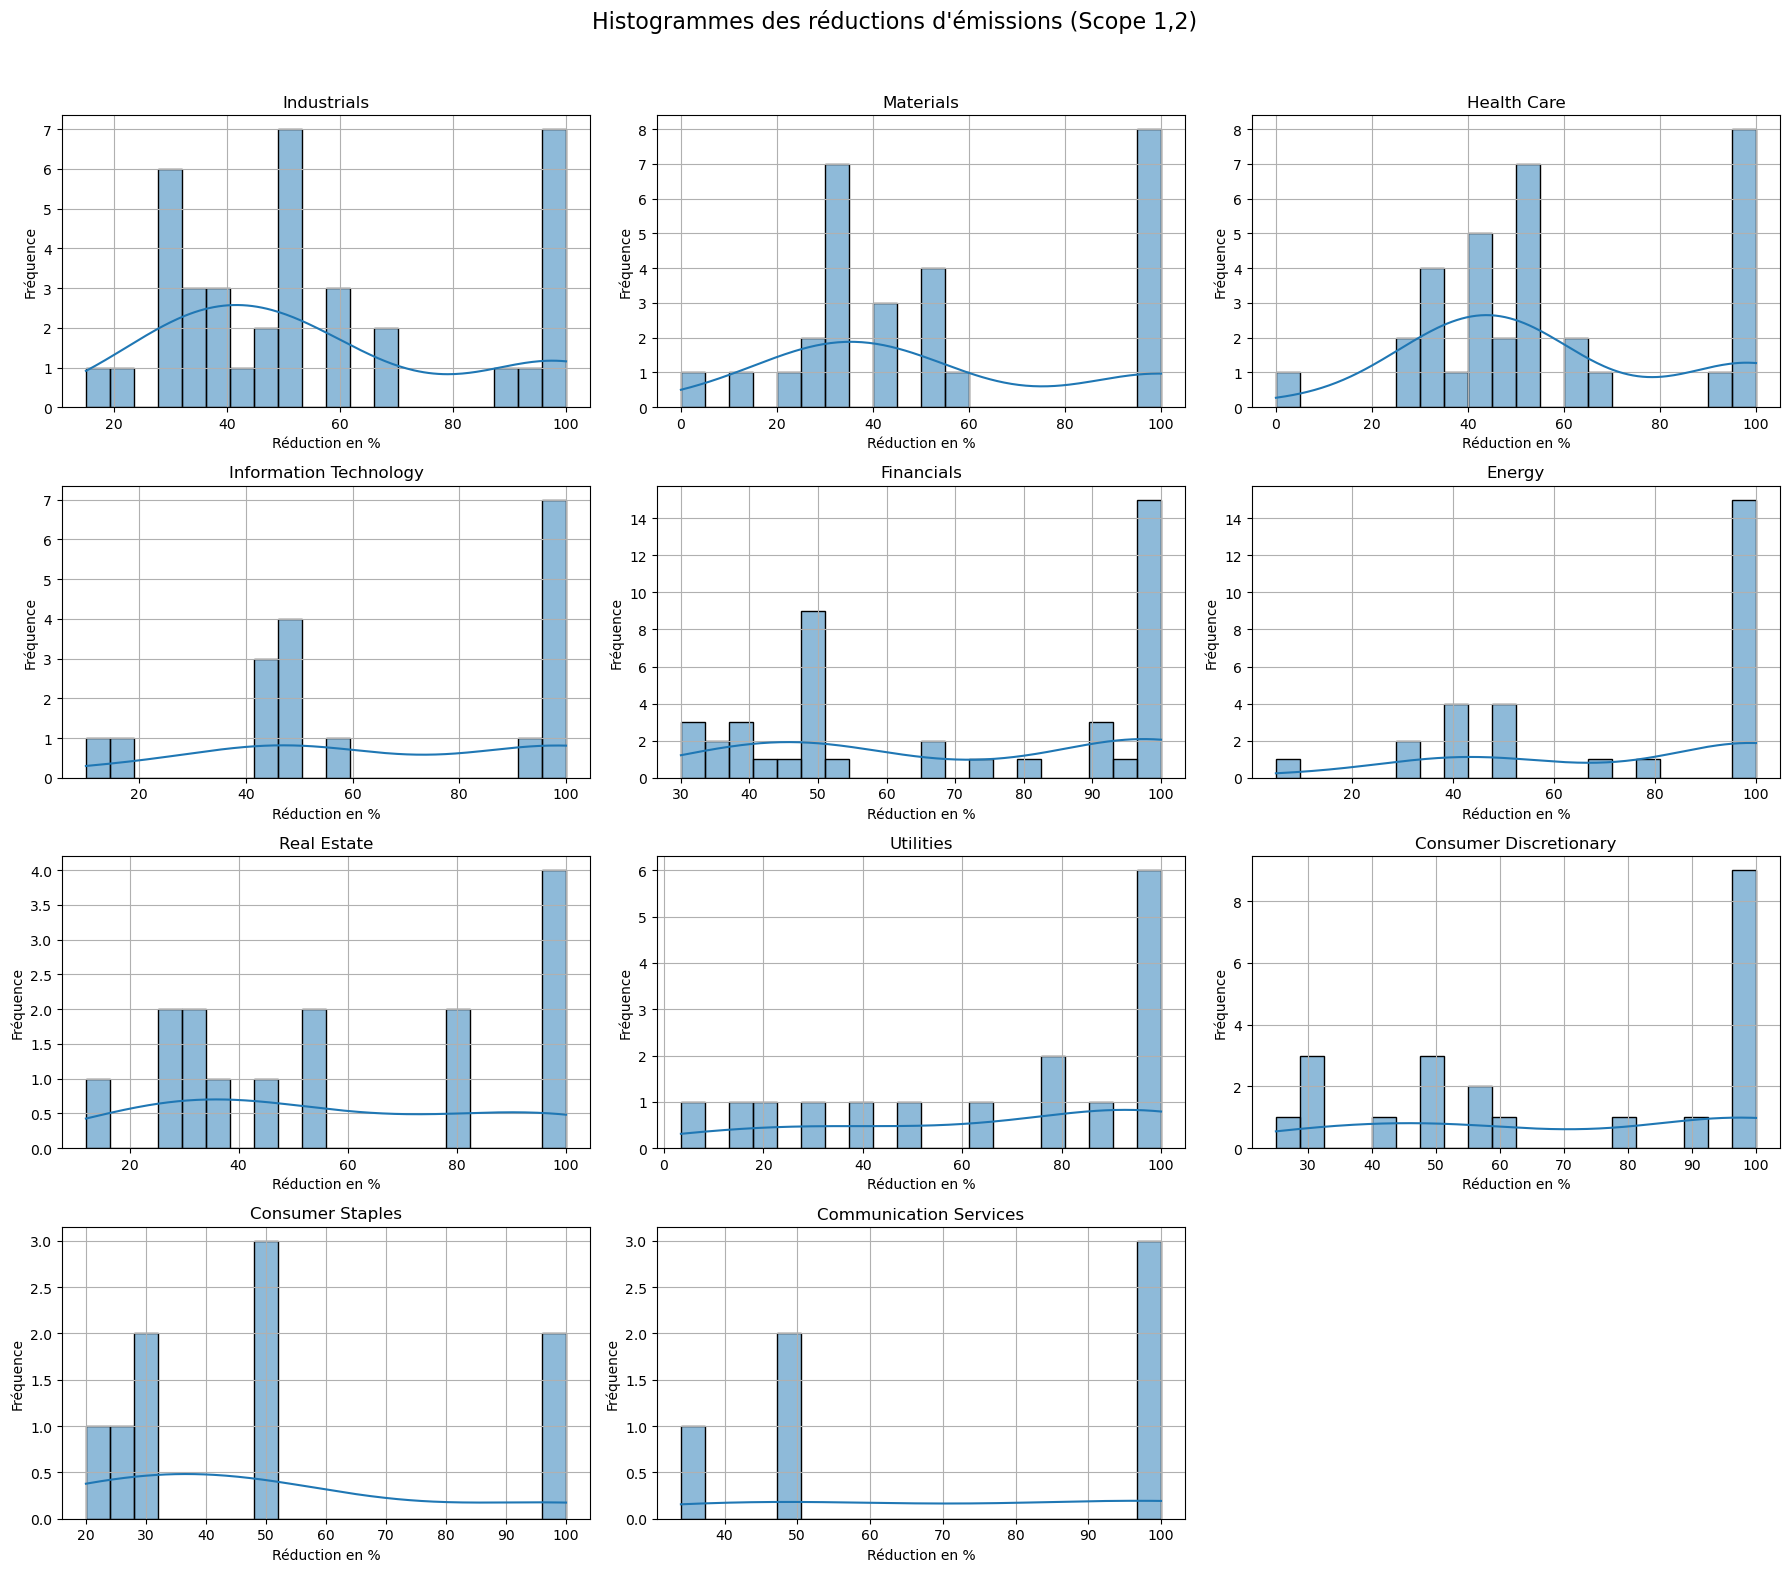

c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

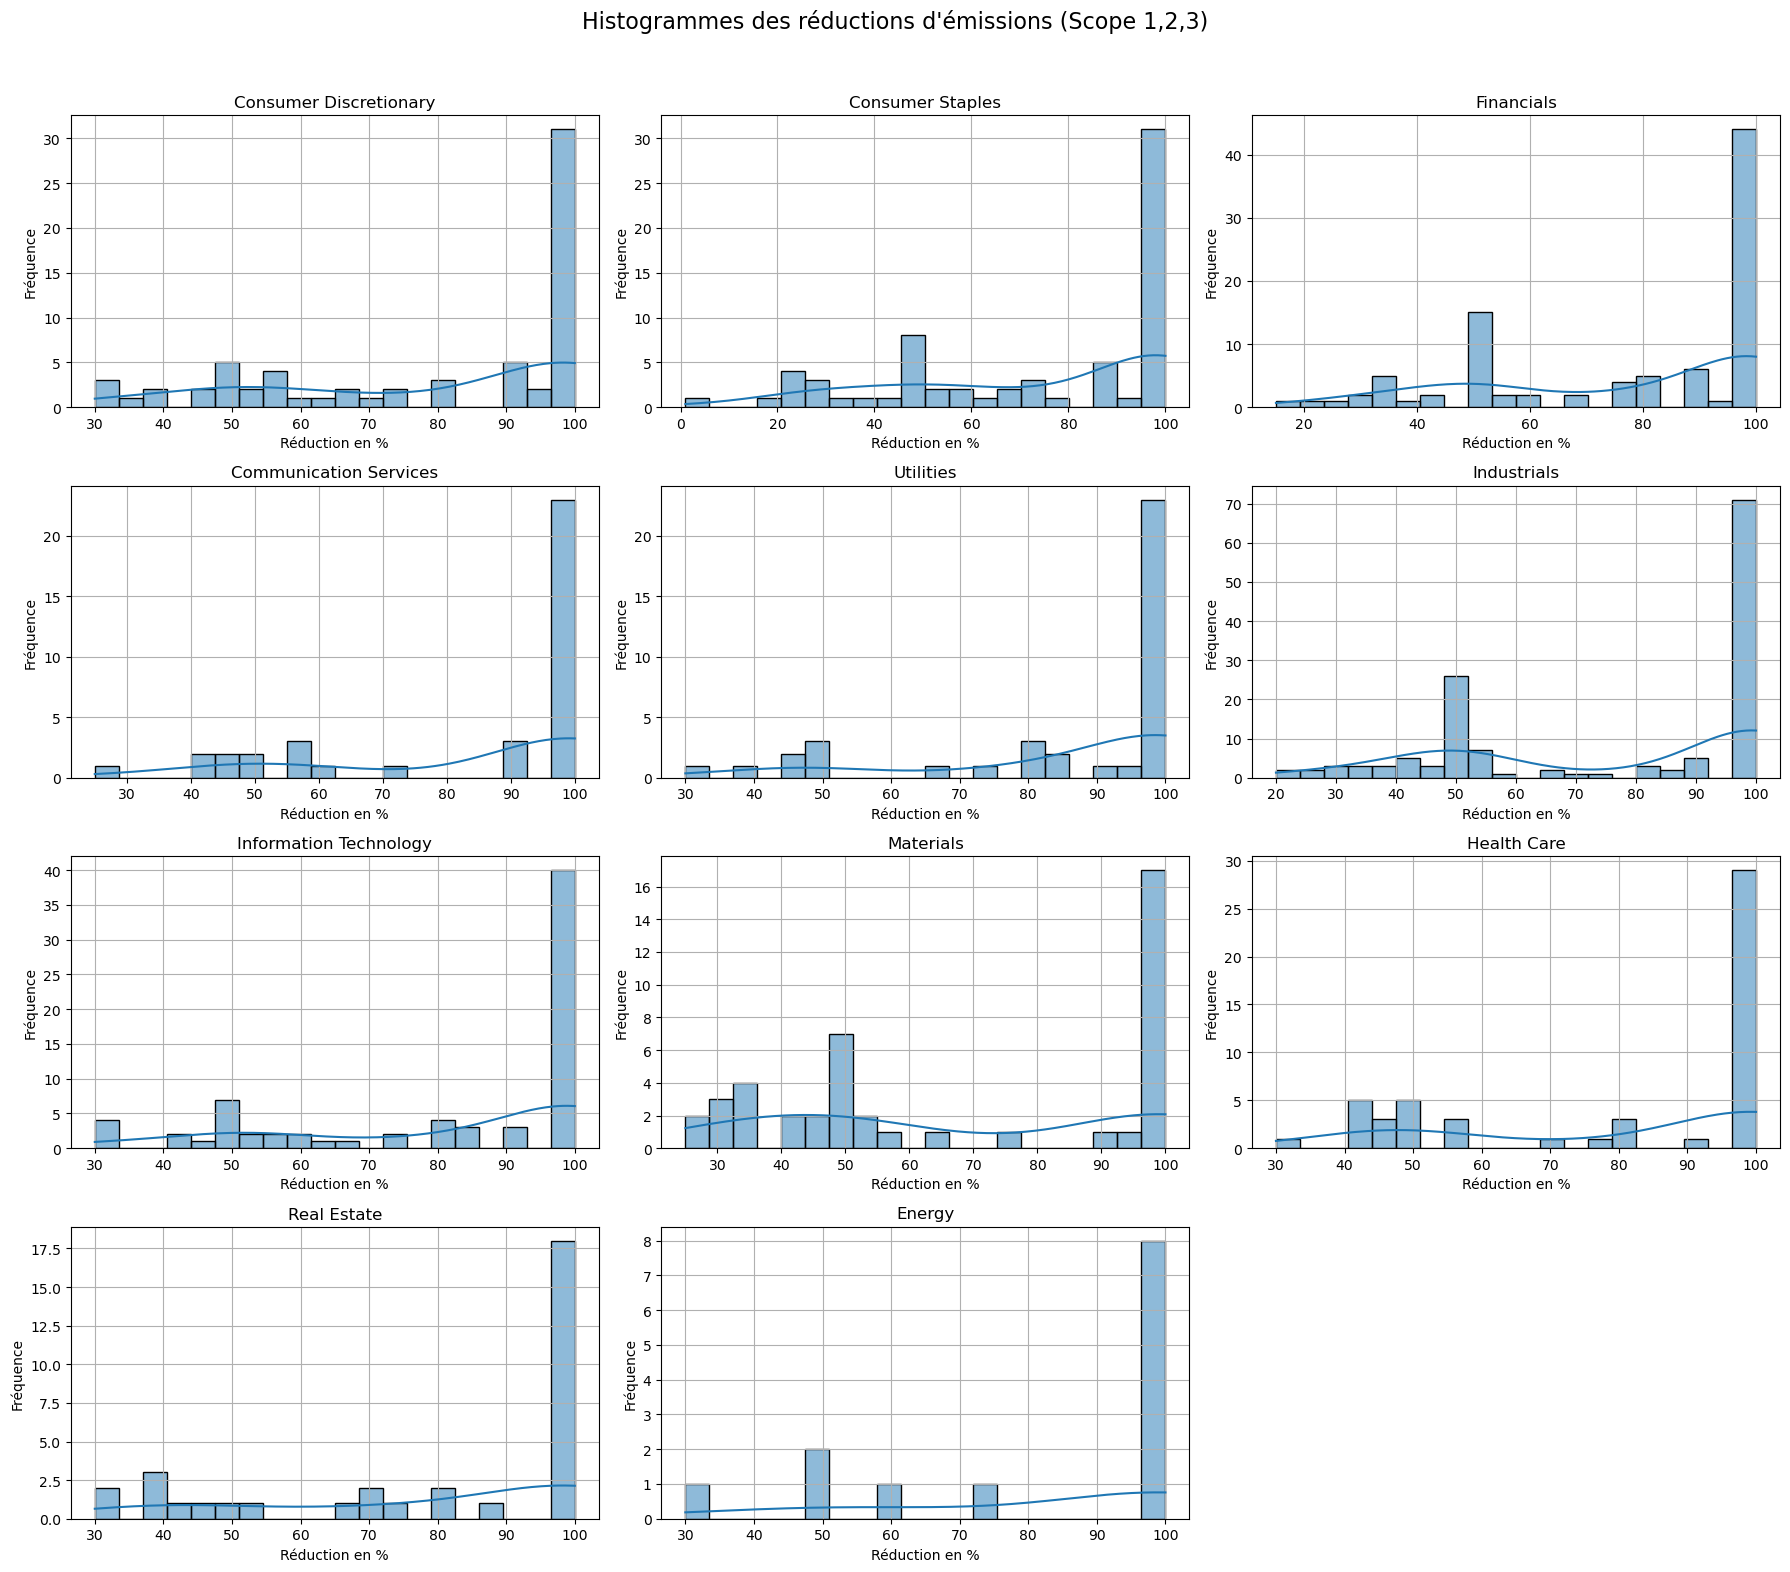

c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flore\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

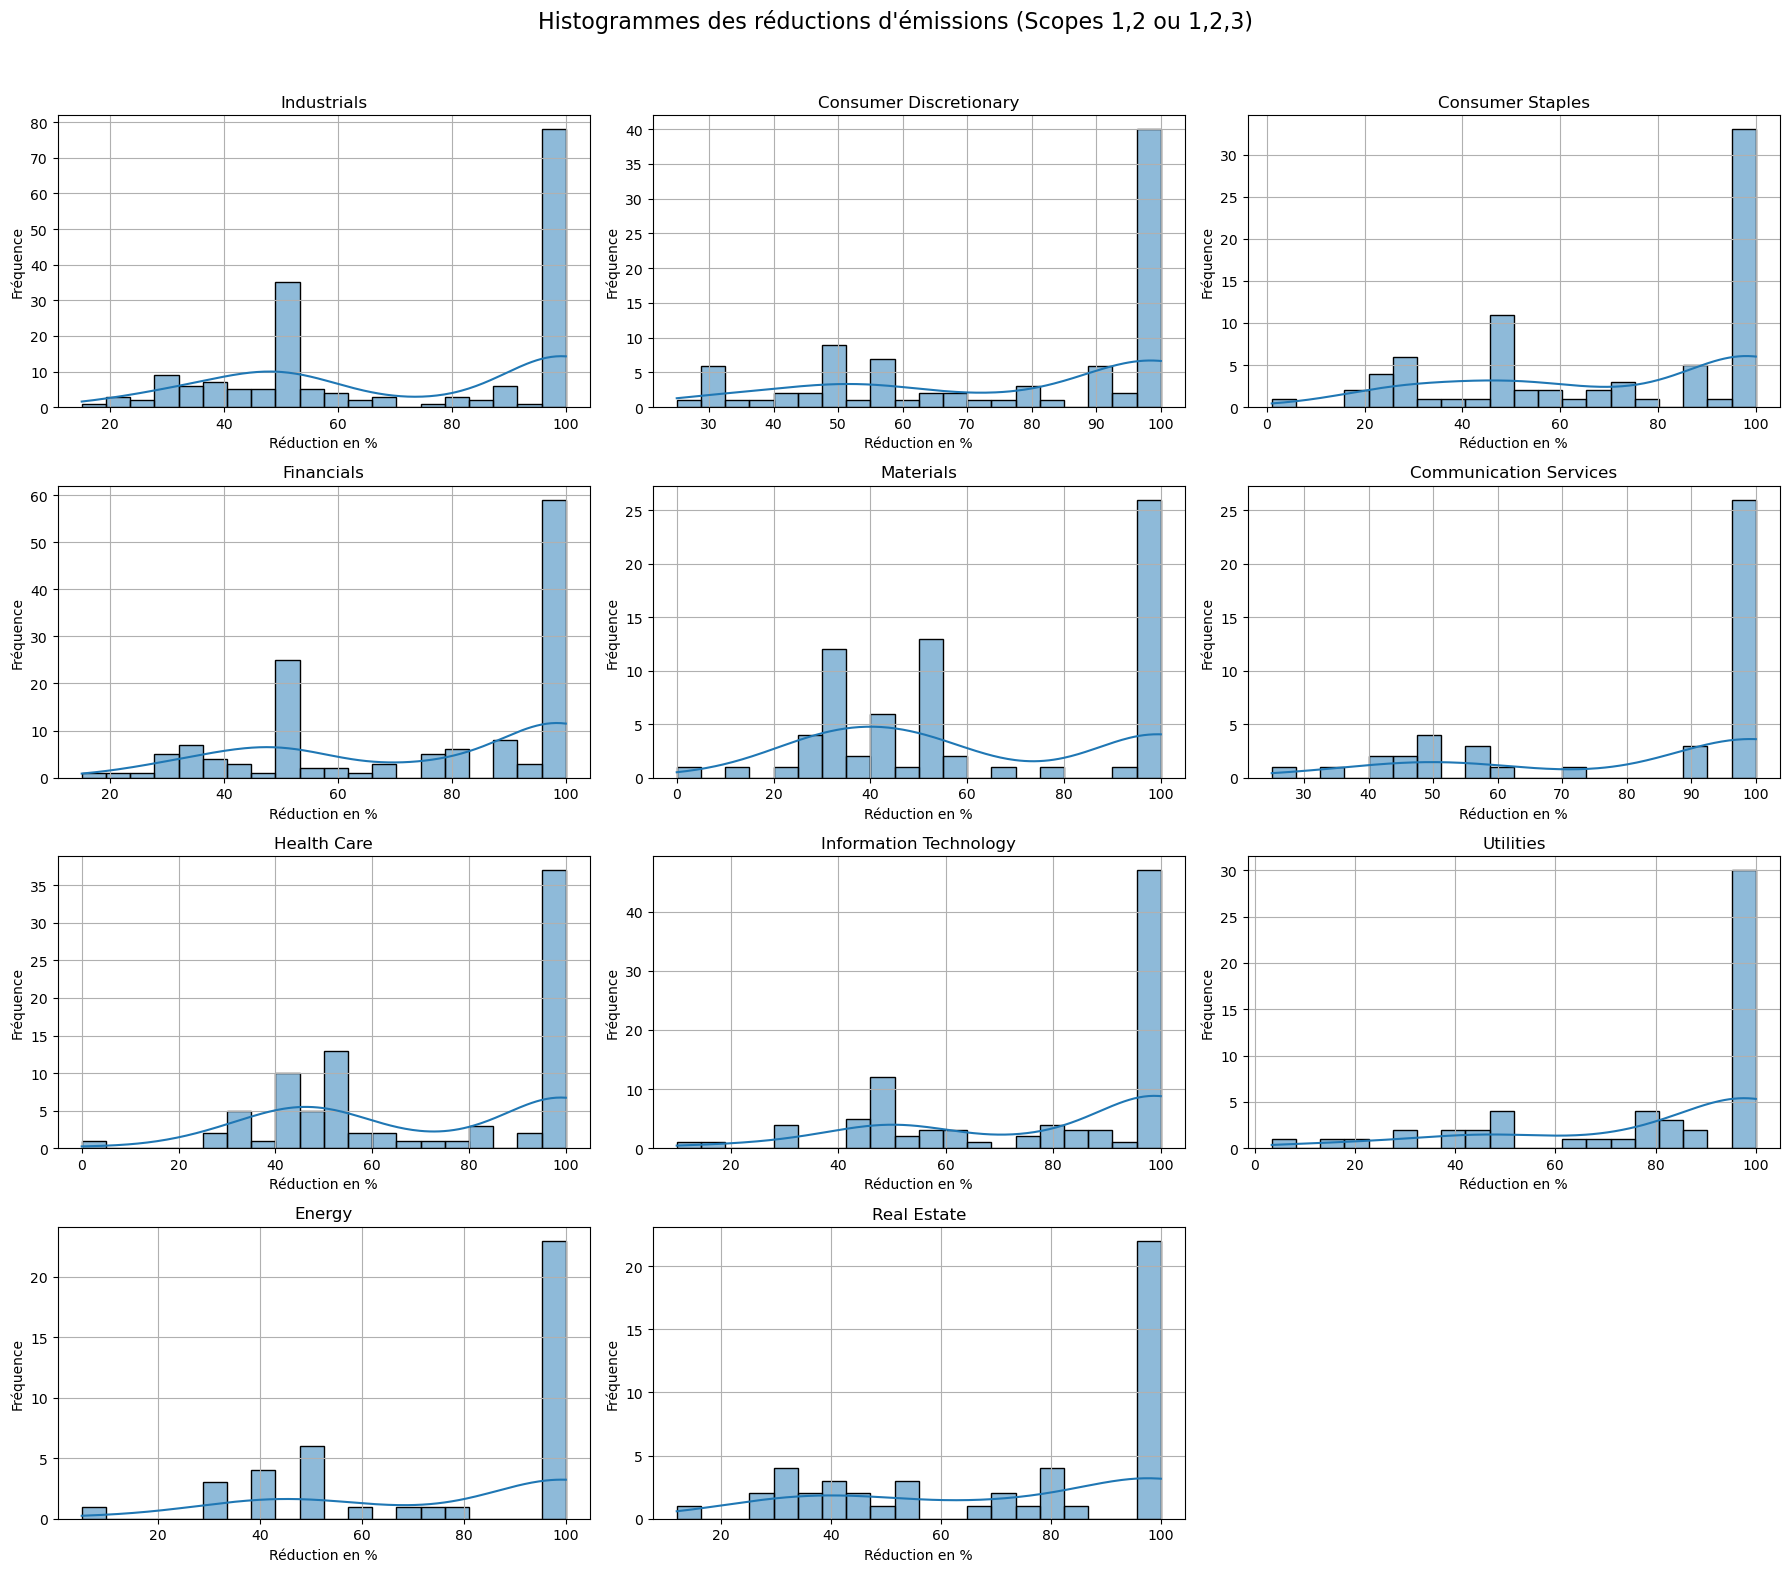

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms_by_sector(data, scope_label, title_suffix=""):
    scope_data = data[data['TARGET_SUMMARY_SCOPES'] == scope_label]
    sectors = scope_data['GICS_SECTOR'].dropna().unique()
    n = len(sectors)

    cols = 3
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axes = axes.flatten()

    for i, sector in enumerate(sectors):
        sector_data = scope_data[scope_data['GICS_SECTOR'] == sector]['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].dropna()

        if not sector_data.empty:
            sns.histplot(sector_data, kde=True, bins=20, ax=axes[i])
            axes[i].set_title(sector)
            axes[i].set_xlabel("Réduction en %")
            axes[i].set_ylabel("Fréquence")
            axes[i].grid(True)
        else:
            axes[i].set_visible(False)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle(f"Histogrammes des réductions d'émissions {title_suffix}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# === 1. Scope 1,2
plot_histograms_by_sector(msci_vs_target, '1,2', title_suffix="(Scope 1,2)")

# === 2. Scope 1,2,3
plot_histograms_by_sector(msci_vs_target, '1,2,3', title_suffix="(Scope 1,2,3)")

# === 3. Union des deux : scope 1,2 ou 1,2,3
combined_scope_data = msci_vs_target[msci_vs_target['TARGET_SUMMARY_SCOPES'].isin(['1,2', '1,2,3'])]
def plot_combined_scope_histograms(combined_data):
    sectors = combined_data['GICS_SECTOR'].dropna().unique()
    n = len(sectors)

    cols = 3
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axes = axes.flatten()

    for i, sector in enumerate(sectors):
        sector_data = combined_data[combined_data['GICS_SECTOR'] == sector]['CARBON_EMISSIONS_TARGET_REDUCT_PCT'].dropna()

        if not sector_data.empty:
            sns.histplot(sector_data, kde=True, bins=20, ax=axes[i])
            axes[i].set_title(sector)
            axes[i].set_xlabel("Réduction en %")
            axes[i].set_ylabel("Fréquence")
            axes[i].grid(True)
        else:
            axes[i].set_visible(False)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle("Histogrammes des réductions d'émissions (Scopes 1,2 ou 1,2,3)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_combined_scope_histograms(combined_scope_data)

### Couverture Scope 3

### Comparaison Engagement / Projections

In [13]:
print(list(msci_vs_target.columns))

msci_vs_target.loc[msci_vs_target["ISSUER_ISIN"] == "US1264081035", ["CARBON_EMISSIONS_TARGET_BASE_YEAR", "CARBON_EMISSIONS_TARGET_REDUCT_PCT", "TARGET_SUMMARY_SCOPES", "CARBON_EMISSIONS_TARGET_YEAR"]]


def project_engagement(issuer):
    issuer_data = msci_vs_target[msci_vs_target["ISSUER_ISIN"] == issuer]

    base_year = issuer_data["CARBON_EMISSIONS_TARGET_BASE_YEAR"].values[0]
    reduction_pct = issuer_data["CARBON_EMISSIONS_TARGET_REDUCT_PCT"].values[0]
    target_year = issuer_data["CARBON_EMISSIONS_TARGET_YEAR"].values[0]

    base_emissions = issuer_data[f"CARBON_EMISSIONS_SCOPE_12_FY{str(int(base_year))[-2:]}"].values[0]
    target_emissions = base_emissions * (1 - reduction_pct / 100)
    step = (target_emissions - base_emissions) / (target_year - base_year)

    # Calculer toutes les emissions jusqu'à l'année cible
    years = np.arange(base_year, target_year + 1, dtype=int)
    emissions = np.zeros(len(years))
    emissions[0] = base_emissions
    for i in range(1, len(years)):
        emissions[i] = emissions[i - 1] + step
    
    return years, emissions


project_engagement("US1264081035")
    

['ISSUER_ISIN', 'GICS_SUB_IND', 'GICS_SECTOR', 'EST_EU_TAXONOMY_MAX_REV', 'CT_TOTAL_MAX_REV', 'EU_TAXONOMY_ADAPTATION_ELIGIBLE_MAX_REV', 'EU_TAXONOMY_MITIGATION_ELIGIBLE_MAX_REV', 'GICS_SECTOR.1', 'Weight', 'CI_Scope12_FY09', 'CI_Scope12_FY10', 'CI_Scope12_FY11', 'CI_Scope12_FY12', 'CI_Scope12_FY13', 'CI_Scope12_FY14', 'CI_Scope12_FY15', 'CI_Scope12_FY16', 'CI_Scope12_FY17', 'CI_Scope12_FY18', 'CI_Scope12_FY19', 'CI_Scope12_FY20', 'CI_Scope12_FY21', 'CI_Scope12_FY22', 'CI_Scope12_FY23', 'CI_Scope12_FY24', 'CI_Scope12_FY25', 'CI_Scope12_FY26', 'CI_Scope12_FY27', 'CI_Scope12_FY28', 'CI_Scope12_FY29', 'CI_Scope12_FY30', 'CI_Scope12_FY31', 'CI_Scope12_FY32', 'CI_Scope12_FY33', 'CI_Scope12_FY34', 'CI_Scope12_FY35', 'CI_Scope12_FY36', 'CI_Scope12_FY37', 'CI_Scope12_FY38', 'CI_Scope12_FY39', 'CI_Scope12_FY40', 'CI_Scope12_FY41', 'CI_Scope12_FY42', 'CI_Scope12_FY43', 'CI_Scope12_FY44', 'CI_Scope12_FY45', 'CI_Scope12_FY46', 'CI_Scope12_FY47', 'CI_Scope12_FY48', 'CI_Scope12_FY49', 'CI_Scope12_FY

(array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
        2025, 2026, 2027, 2028, 2029, 2030]),
 array([5840132.     , 5703983.92275, 5567835.8455 , 5431687.76825,
        5295539.691  , 5159391.61375, 5023243.5365 , 4887095.45925,
        4750947.382  , 4614799.30475, 4478651.2275 , 4342503.15025,
        4206355.073  , 4070206.99575, 3934058.9185 , 3797910.84125,
        3661762.764  ]))

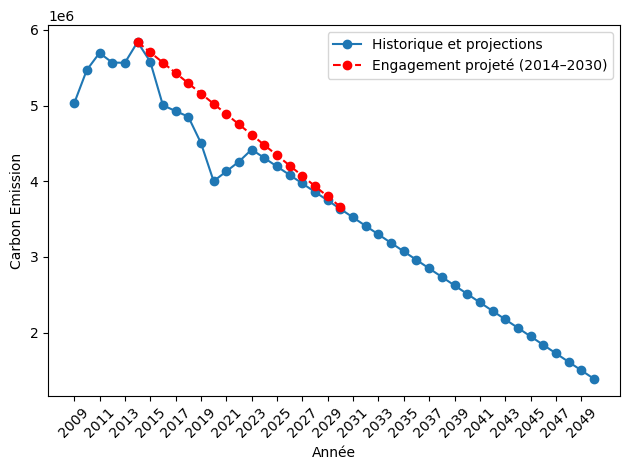

In [14]:
import matplotlib.pyplot as plt

# 1. Tracer les émissions historiques
emission_cols = [col for col in msci_vs_target.columns if "CARBON_EMISSIONS_SCOPE_12" in col]
years_full = [int(col.split("FY")[-1]) + 2000 for col in emission_cols]

emissions_data = msci_vs_target.loc[
    msci_vs_target["ISSUER_ISIN"] == "US1264081035",
    emission_cols
].T

emissions_data.index = years_full


plt.plot(emissions_data.index, emissions_data.values, marker='o', label="Historique et projections")


years_proj, emissions_proj = project_engagement("US1264081035")


plt.plot(
    years_proj, 
    emissions_proj, 
    label="Engagement projeté (2014–2030)", 
    color='red', 
    linestyle='--', 
    marker='o'
)

plt.xticks(range(min(years_full), max(years_full) + 1, 2), rotation=45)
plt.xlabel("Année")
plt.ylabel("Carbon Emission")
plt.legend()
plt.tight_layout()
plt.show()
